#  ATOC5860 Application Lab #3 - eigenfaces
##### Written by Dr. Vineel Yettella (ATOC Ph.D. 2018, now at Apple), with additional commenting from Prof. Kay (CU)
##### last updated February 22, 2023 - works with environment atoc5860env2023clean.yml

### LEARNING GOALS:
1) Complete an EOF analysis using Singular Value Decomposition (SVD). 
2) Provide a qualitative description of the results. What are the eigenvalues, the eigenvectors, and the principal components?  What do you learn from each one about the space-time structure of your underlying dataset?
3) Provide a qualitative description of the results: What are the eigenvalue,the eigenvector, and the principal component?  What do they mean physically? What do you learn from each one about the space-time structure of the underlying dataset?
4) Reconstruct original data using a subset of EOFs: How many EOFs are needed to reconstruct faces?

### DATA and UNDERLYING SCIENCE MOTIVATION:  
In this notebook, you apply EOF analysis to a standard database for facial recognition: the At&t database. 

*“Our Database of Faces, (formerly 'The ORL Database of Faces'), contains a set of face images taken between April 1992 and April 1994 at the lab. The database was used in the context of a face recognition project carried out in collaboration with the Speech, Vision and Robotics Group of the Cambridge University Engineering Department.

There are ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).”*

The goal is to think a bit “out of the box” of Atmospheric and Oceanic Sciences about potential applications for the methods you are learning in this class.  And also to think about some of the pitfalls of using statistics for facial recognition. Are the faces here representative of all faces?

### Non-exhaustive Questions to guide your analysis:  
1) Execute all code without making any modifications. What do the EOFs (spatial patterns) tell you?  What do the PCs tell you?  How do you interpret what you are finding?

sean: the EOFs (eigenfaces) tell me what the big spatial patterns are in the dataset (i.e. what spatial patterns can be seen in the bulk of the dataset, in this case facial features). Each eigenface shows facial features that explain variance in the entire dataset, with the first eigenface explaining the most variance in the total dataset. Each eigenface after the first explains less and less variance. The principal components tell me how much each corresponding EOF looks like the data accross the sampling dimension (n_faces --> which image in the dataset). I am interpreting what I'm finding through the variance explained by each eigenface. Here the first eigenface explains about 17.5% of the variance within the dataset. However, errorbars/uncertainty is missing in this analysis.

2) Reconstruct a face.  How many EOFs do you need to reconstruct a face from the database?  Does it depend on the face that it used?

sean: From playing around with the "weights_num" variable, I found that you need about 100 EOFs to reconstruct a face somewhat decently. Of course, more EOFs give you a better outcome (i.e. reconstructs the face better). And yes, it does depend on the face. Some faces can be reconstructed well with many fewer EOFs (like around 50 or a bit less). I think that the closer the individual facial features of the chosen face is to the average face, the fewer EOFs are needed to reconstruct it. But I'd like to test this out a bit more

3) Food for thought: The database contains 75% white men.  How do you think this database sampling limitation impacts the utility of the database for subjects who are not white men?  What are some parallels that you might draw when analyzing atmospheric and oceanic sciences datasets?  Hint: Think about the limitations of extrapolation beyond the domain where you have data.

sean: Knowing that this database contains 75% white men, I think it impacts the utility of the database for subjects who are not white men since the facial features of white men can be drastically different from those that are not white men. For instance, white women on average have different facial characteristics than those of white men. Furthermore, non-white people also have drastically different facial features on average. Some parallels that I can draw when analyzing atmospheric and oceanic sciences datasets including not having a large enough time domain to use EOF analysis over. If I only have a few snapshots over a short period, I cannot really trust that the patterns found in EOF analysis represent the large spatial patterns over a region. Furthermore, not having frequent enough data is also a limitation. If I only have a few snapshots of data over 100 years, then I would wonder if I'm missing spatial patterns because of the frequency my data was collected at.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
#load faces. Adapted from the AT&T face database
att_faces = np.load('att_faces.npy')
height, width, n_faces = att_faces.shape
print((height, width, n_faces))

(112, 92, 400)


In [28]:
# print(type(att_faces))
# att_faces

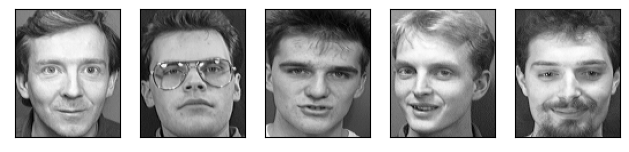

In [26]:
#print a few faces from the database - Look at your data!!
n = 5
fig, axs = plt.subplots(1, n)

random_face_inds = np.random.choice(np.arange(n_faces), n, replace=False)
for i, ax in enumerate(axs):
    ax.imshow(att_faces[:, :, random_face_inds[i]], cmap = 'gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

fig.tight_layout()

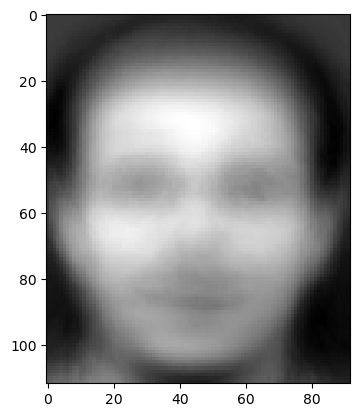

In [27]:
#print the average face
average_face = np.mean(att_faces, axis = 2);
plt.imshow(average_face, cmap = 'gray');

In [29]:
#Construct the data matrix. Samples (different faces) along rows and 
#variables (individual pixels) along columns
print(att_faces.shape)
data_matrix = np.reshape(att_faces, (height*width, n_faces)).T
print(data_matrix.shape)

#Construct anomaly matrix by removing the average face, i.e., 
#by removing the column means from each column of the data_matrix
anomaly_matrix = data_matrix - np.mean(data_matrix, axis=0)
#anomaly_matrix = anomaly_matrix/np.std(anomaly_matrix, axis=0)
[eofs, s, v] = np.linalg.svd(anomaly_matrix.T, full_matrices=False)
print(eofs.shape)

eigenvals = np.square(s)
variance_explained = eigenvals/np.sum(eigenvals)

(112, 92, 400)
(400, 10304)
(10304, 400)


In [45]:
# data_matrix
# 112*92
print(np.mean(data_matrix, axis=0).shape)
print(np.mean(data_matrix, axis=1).shape)
print(anomaly_matrix.shape)
print(eofs.shape)
print(s.shape)
print(v.shape)

(10304,)
(400,)
(400, 10304)
(10304, 400)
(400,)
(400, 400)


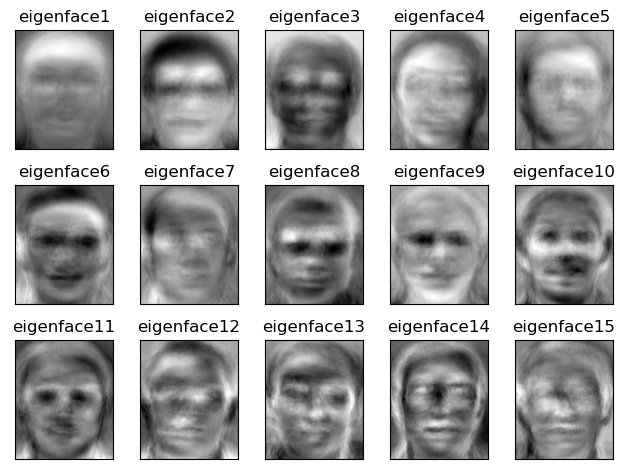

In [130]:
#Plot the top 15 eofs (a.k.a eigenfaces)

fig, axs = plt.subplots(3, 5)

for i, ax in enumerate(np.reshape(axs, 15)):
    eigenface = np.reshape(eofs[:, i], [height, width])
    ax.imshow(eigenface, cmap='gray')
    ax.set_title('eigenface' + str(i+1))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

fig.tight_layout()

In [50]:
print(eigenface.shape)

(112, 92)


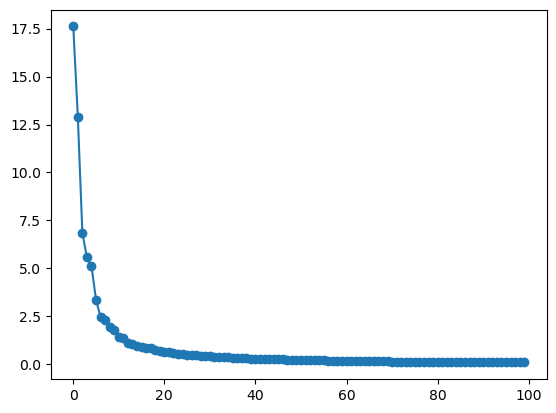

In [51]:
#Plot variance explained by each eigenface
plt.plot(variance_explained[0:100]*100, marker='o')

(400, 400)
(50,)
(112, 92)


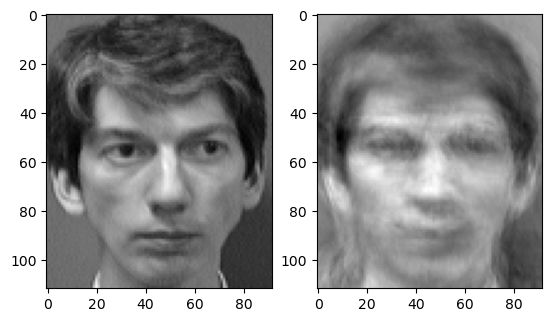

In [128]:
#project the faces onto the eigenfaces
weights = np.dot(anomaly_matrix, eofs)
print(weights.shape)

#choose a face to reconstruct
face_num = 275 #0 to 389
original_face = att_faces[:, :, face_num]

#choose number of weights to reconstruct face
weights_num = 50
face_weights = weights[face_num, 0:weights_num]
print(face_weights.shape)
reconstructed_face = np.dot(eofs[:, 0:weights_num], face_weights)

#At this point, the reconstructed face is an anomaly face with the average face removed. 
#Add back the average face to get the original face

reconstructed_face = np.reshape(reconstructed_face, (height, width)) + average_face
print(reconstructed_face.shape)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(original_face, cmap='gray');
axs[1].imshow(reconstructed_face, cmap='gray');

In [58]:
print(weights.shape)
print(face_weights.shape)

(400, 400)
(200,)
